<a href="https://colab.research.google.com/github/olli-turnb/AI-CNN-Workshop/blob/master/CNNWorkshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#@title <----(Run this first!!! -  All the background nonsense)
import warnings
warnings.filterwarnings("ignore")
!pip install git+git://github.com/stared/livelossplot.git
from livelossplot.keras import PlotLossesCallback
!git clone https://olli-turnz@bitbucket.org/olli-turnz/cnn-workshop-data.git
!unzip cnn-workshop-data/PetImages-20190315T092016Z-001.zip
import tensorflow as tf
from keras import regularizers
from keras.layers import Conv2D, MaxPool2D, Activation, Flatten, Dense, Dropout
from keras.models import Sequential, load_model
import numpy as np
import seaborn as sns
from random import shuffle 

import tensorflow as tf
from keras import regularizers
from keras.layers import Conv2D, MaxPool2D, Activation, Flatten, Dense, Dropout
from keras.models import Sequential, load_model
import pandas as pd
import os
from skimage import io, transform
import numpy as np

rootCat = 'cnn-workshop-data/PetImages/Cat/'
rootDog = 'cnn-workshop-data/PetImages/Dog/'
 
f = os.listdir(rootCat)
g = os.listdir(rootDog)



data = []
for file in f[:-1000]:
    try:
        myimage = io.imread(rootCat + file).astype( np.float32)/255
        myimage = transform.resize(myimage, (64,64,3))
        data.append((myimage,1))
    except:
        pass
for file in g[:-1000]:
    try: 
        myimage = io.imread(rootDog + file).astype( np.float32)/255
        myimage = transform.resize(myimage, (64,64,3))
        data.append((myimage,0))
    except:
        pass

test_data = []
for file in f[-1000:]:
    try:
        myimage = io.imread(rootCat + file).astype( np.float32)/255
        myimage = transform.resize(myimage, (64,64,3))
        test_data.append((myimage,1))
    except:
        print('whoops, bad cat')
for file in g[-1000:]:
    try: 
        myimage = io.imread(rootDog + file).astype( np.float32)/255
        myimage = transform.resize(myimage, (64,64,3))
        test_data.append((myimage,0))
    except:
        print('whoops, bad dog')
        
from keras.utils import to_categorical
import tensorflow as tf
mnist = tf.keras.datasets.mnist

train = 0
test = 1

image_size = (28,28,1)
training_data = mnist.load_data()[train]
testing_data = mnist.load_data()[test]

11493376/11490434 [==============================] - 0s 0us/step



# Intro To CNNs

Hello class and welcome to this introductory workshop on supervised deep learning - more specifically the use of Convolutional Neural Networks (CNNs) for image recognition.

#What is a neural network?

Formally speaking, a neural network is a sequence of successively applied generalised linear models which - theoretically - is capable of approximating any function. 

$$h^{(l)} = g^{(l)}(h^{(l-1)};\beta^{(l)})$$ 

where $l = \{1,\ldots,n\}$ describes the layer of the n-layer neural network, $h^{(l)}$ is the $l^{\textrm{th}}$ hidden layer- a non linear activation function- and $\beta^{(l)}$ is a vector of a paramaters specifying an element of the function family $g^{(l)}$;   but you're probably more used to seeing them like this:


![alt text](https://cdn-images-1.medium.com/max/1600/1*DW0Ccmj1hZ0OvSXi7Kz5MQ.jpeg)

This represents a series of operations applied to some vector input layer to give some output, depending on a collection of weights (represented by the edges in the graph). Essentially, the network functions as a black box: you put in some array of number, it spits you out an array of numbers, and which numbers it spits out given your input depends on the values of these weights. 



Suppose we wish the black box to mimic the output of some function, such as the relationship between height and life expectancy for example, with this network but don't know what weights we should give the graph to get the right function. We want some process of, starting with some random set of weights and then looking at how wrong the output is from what we would expect, adjusting these weights until we get as close to the true function as possible - which is always possible for neural networks with enough hidden dimensions since neural networks are [universal function approximators](https://en.wikipedia.org/wiki/Universal_approximation_theorem). Luckily such a process exists: we use something called **backpropagation**.

# How backprop works

In order to determine the correct weights to use for the neural network, we need 2 things: 

1.   A **loss function**
2.   A way of minimising the loss function

A **loss function** is just some numerical measure of how inaccurate your network is given its current weights, a kind of 'error' function, and clearly to get the right weights we want the weights that minimise this inaccuracy. The method of doing this is usually some variation on **Gradient Descent** (more information [here](https://en.wikipedia.org/wiki/Gradient_descent)).

![alt text](http://donsoft.io/deep-learning-with-rnns/images/gradient_descent_cropped.gif)

Formally, gradient descent is a rule foor updating your weights in a way that is supposed to converge to the correct value as follows
$$\beta_{t+1} = \beta_t - \nabla_\beta l|_{\beta = \beta_t} $$ 
But all this means is that you subtract off the direction to move beta in that would increase the loss, here denoted $l$, the most. I.e. if we shift one of the weights up, and the loss goes up too, we want to decrease that weight. We calculate this     $ \nabla_\beta l|_{\beta = \beta_t}$ value (a vector called the **gradient**) by the aforementioned process known as **backpropagation**.


Each node in the above graph represents a function - often called an 'activation function' which combines all the outputs of the nodes in the layer before. At each layer, we multiply the previous layer's output by all its connecting weights and then apply the activation function for this layer. These activation functions can take a few forms:



1.   A ReLU function ($0$ if the input is $<0$, else return the input - there are a few variants of this)
2. A Sigmoid function (for squahing the input to between 0 and 1)

1.   A Softmax function (this makes all input elements in the previous layer close to 0 except the largest one which it makes close to 1 - good for multi-class prediction output layer)

But an exhaustive list can be found [here](https://en.wikipedia.org/wiki/Activation_function).

we then use rules of [differentiation](https://https://en.wikipedia.org/wiki/Gradient) on each node of the graph to calculate this value going in and out of each computational node something like: 


![alt text](https://leonardoaraujosantos.gitbooks.io/artificial-inteligence/content/Images/MulGate.png)


we keep doing this until the loss decreases to a point where we are satisfied out function is adequately approximated.


The loss functions themselves take a few forms too - can find a list [here](https://towardsdatascience.com/common-loss-functions-in-machine-learning-46af0ffc4d23)-  but for practical purposes you want something called the crossentropy loss for categorical classification problems - categorical crossentropy for multiple categories and binary crossentropy for 1 and 0 output classification.



# What is a Convolutional Neural Network?

A convolutional neural network is a particular flabour of neural network with a slightly modified architecture, intended for dealing with image comprehensions. This architecture consists of two parts: 

1.   Feature extraction
2.   Classification

In the first part, the network does convolution and pooling operations to summarize the image into something called a feature vector, where each component describes a different feature of the image (though its not always clear what these are).

The classification part is then a regular neural network taking the feature vector as input and outputs some vector summarising the image in some way; whether that be a binary classification ( 1 or 0), or a category classification (a vector with one element being one and the rest being 0) or even something more exotic like a word embedding (see the extension task for more info on these).

![alt text](https://adeshpande3.github.io/assets/Cover.png)

CNNs usually take as input a numerical matrix describing the different RGB colour channels for an image, so there usually has to be some preprocessing involved to get the images as an array of numbers ready to be put through, 

![alt text](https://adeshpande3.github.io/assets/Corgi3.png)

luckily for the first two tasks we will have done this for you.  The convolutional layers take a sliding window over the image as so:

![alt text](https://cdn-images-1.medium.com/max/600/0*Asw1tDuRs3wTjwi7.gif)

and then perform something called a max pooling operation after a number of convolutions:

![alt text](https://computersciencewiki.org/images/8/8a/MaxpoolSample2.png)

For the first example we have used a $3\times3$ convolution window and a $2\times2$ pool size since these are [generally accepted to work well](https://towardsdatascience.com/deciding-optimal-filter-size-for-cnns-d6f7b56f9363), but feel free to try out whatever sizes you want on your own examples, since the spirit of machine learning is experimentation!

# Task #1: Cat Classification

For your first task, we have prepared a dataset containing labelled images of cats and dogs (1 for a cat 0 for a dog) and we will walk you through how to build an algorithm to differentiate between the two.

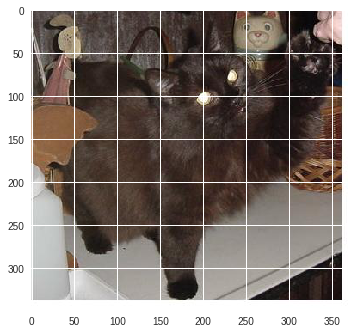

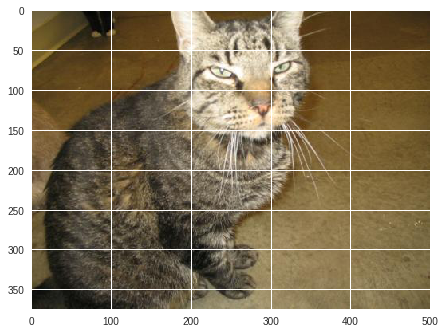

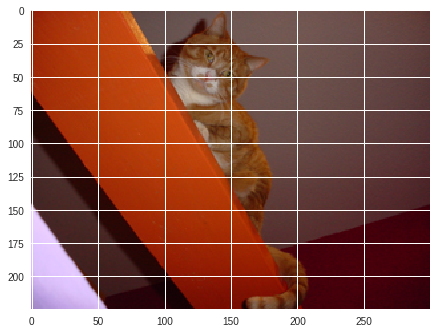

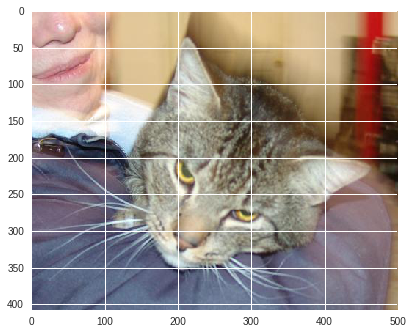

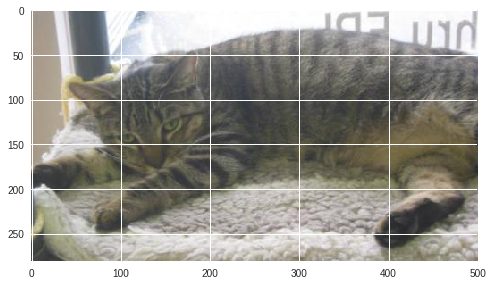

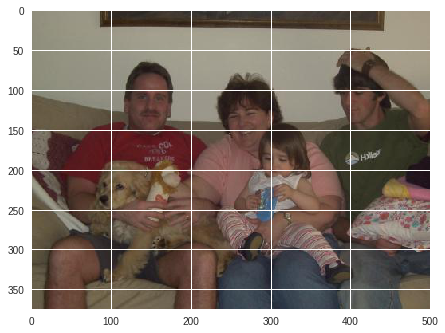

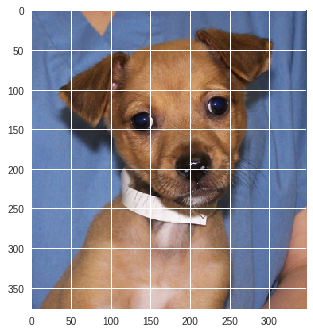

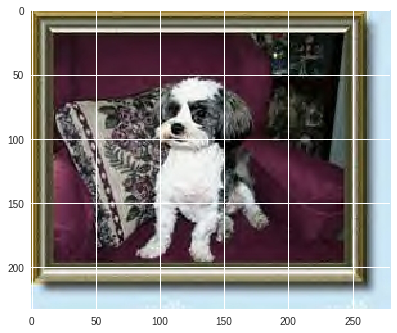

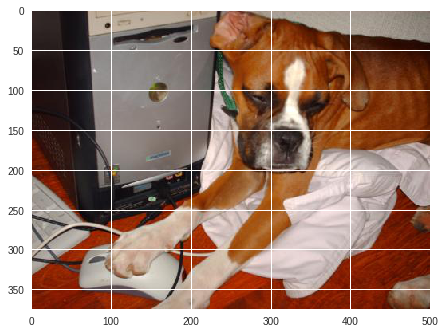

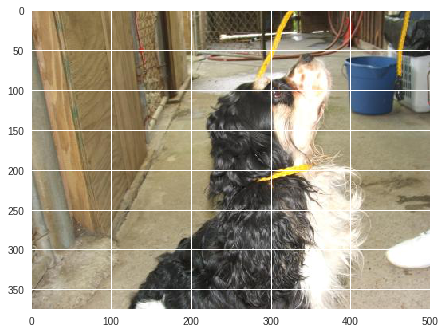

In [0]:
#@title Some cats and dogs { vertical-output: true }
import matplotlib
import matplotlib.pyplot as plt
for i in range(5):
    theimage = io.imread(rootCat + f[i]).astype( np.float32)/255
    plt.imshow(theimage)
    plt.show()
for i in range(5):
    theimage = io.imread(rootDog + g[i]).astype( np.float32)/255
    plt.imshow(theimage)
    plt.show()


# Intro to Keras

Keras is a pre-put together deep learning package the cuts through a lot of the nasty nitty gritty of programming deep learning models. There are a few different ways to use keras, but we will be using it to make sequential models, where we add layers to the model one at a time.  You can find all of the keras documetnation [here](https://keras.io/models/model/#evaluate)

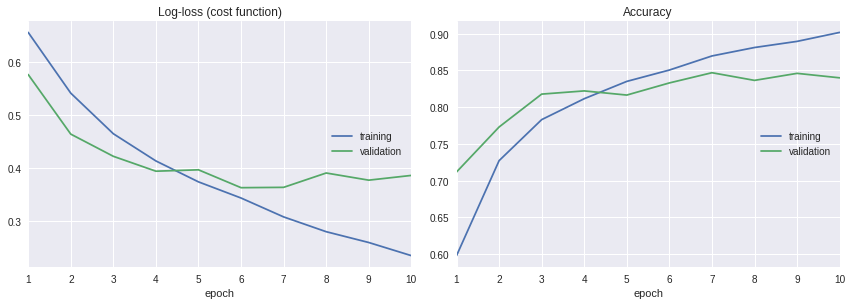

Log-loss (cost function):
training   (min:    0.235, max:    0.657, cur:    0.235)
validation (min:    0.363, max:    0.577, cur:    0.386)

Accuracy:
training   (min:    0.598, max:    0.902, cur:    0.902)
validation (min:    0.712, max:    0.847, cur:    0.840)


In [0]:
#the first two numbers are the size of the image, the last number is the number of channels (in this case 3 for Red Blue and Green - greyscale images would only have 1 channel.)
image_shape = (64,64,3)

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=image_shape))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(rate = 0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

shuffle(data)

X_train = np.array([i[0] for i in data]) #

y_train = np.array([i[1] for i in data]).reshape((len(data),))

model.fit(X_train, y_train, validation_split = 0.1, epochs=10, callbacks=[PlotLossesCallback()])


Now let us test out the model we'eve just created. First lets prepare the testing data:


In [0]:
X_test = np.array([i[0] for i in test_data])
y_test = np.array([i[1] for i in test_data])

Now for the testing itself:

In [0]:
# Here is how to evaluate your model in keras

model.evaluate(X_test, y_test)

2000/2000 [==============================] - 1s 336us/step


[0.39979065662622454, 0.8345]

# Task #2: MNist character classification

MNist is a data set of greyscale handwritten decimal digits, each labelled with the digit they are meant to represent. Your task, based on above information, is to train a convolutional neural network to classify each element into the digit it represents. Here are a few examples of images from this dataset:

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Label: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Digit in the image 8


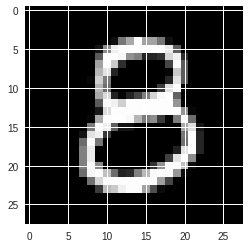

Label: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Digit in the image 6


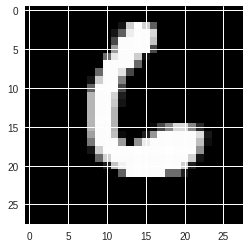

Label: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Digit in the image 6


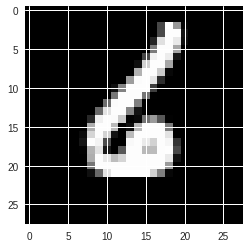

Label: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Digit in the image 0


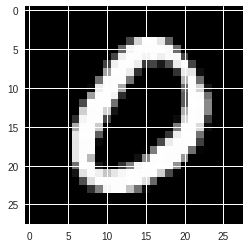

Label: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Digit in the image 8


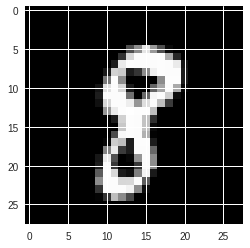

Label: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Digit in the image 1


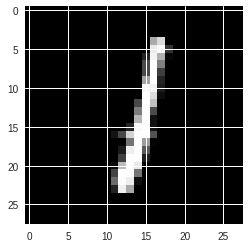

Label: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Digit in the image 5


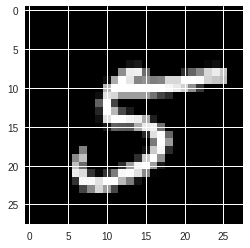

Label: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Digit in the image 0


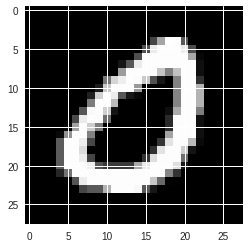

Label: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Digit in the image 6


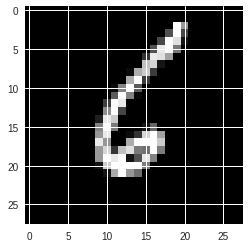

Label: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
Digit in the image 3


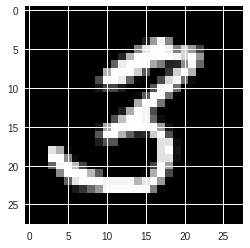

In [0]:
#@title The MNist data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

image_count = 10
data = mnist.train.next_batch(image_count)

images = data[0]
labels = data[1]

# import matplotlib for visualization
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

for index, image in enumerate(images):
    print('Label:', labels[index])
    print('Digit in the image', np.argmax(labels[index]))
    plt.imshow(image.reshape(28,28),cmap='gray')
    plt.show()

Your next task is to build a model that will input one of these images and output the digit that it represents. We've prepared the data for you below:

In [0]:
X_train_mnist = np.array([np.expand_dims(i,axis = 2) for i in training_data[0]]) #here's your data prepared for training, X_train_mnist is your input data, y_train_mnist is your output
y_train_mnist = to_categorical(training_data[1]) # this line turns the list of integers given in the dataset into a one hot encoded vector

#Testing data preparation
X_test_mnist = np.array([np.expand_dims(i,axis = 2) for i in testing_data[0]])
y_test_mnist = to_categorical(testing_data[1])
image_shape = (28,28,1)

"""

Write your model below here!!!!

"""





model.fit(X_train_mnist, y_train_mnist, epochs = 10, validation_split = 0.1)

In [0]:
model.evaluate(X_train_mnist,y_train_mnist)

#Transfer learning AKA the franken-network

*if it ain't broke dont fix it*

Building our own models is all well and good, but a lot of clever people have been working on these problems for a good number of years now -  surely we dont have to build and train every part of our model every time? Luckily we do not, and plenty of pretrained models can be found in `keras.applications`. We will be chopping the head of a model called VGG16, and training our own classifier head on the features it extracts from images - fewer layers to train means faster training.



In [0]:
from keras import applications, Model

#Method 1 - treat the pre trained network as a feature extractor to pipe into a regular neural network

pt_model = applications.VGG16(include_top=False, weights='imagenet', input_shape=(64,64,3))

top_model = Sequential()
top_model.add(Flatten())
top_model.add(Dense(64, activation='elu'))
top_model.add(Dropout(0.5))
top_model.add(Dense(1, activation='sigmoid'))
top_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

training_data = pt_model.predict(X_train) 

top_model.fit(training_data, y_train, validation_split = 0.1, epochs = 10, callbacks=[PlotLossesCallback()])

    


In [0]:
#Method 2 - stitch the two together into a franken-network with the feature extraction layers 
pt_model = applications.VGG16(include_top=False, weights='imagenet', input_shape=(64,64,3))

new_model = Sequential()


#Add in all the layers from the pre-trained VGG16 model
for l in pt_model.layers[:-1]:
    new_model.add(l)

# Freeze the convolution layers
for layer in new_model.layers:
    layer.trainable = False

#Now lets build our own head for this model:
head_model = Sequential()
head_model.add(Flatten())
head_model.add(Dense(256, activation='relu'))
head_model.add(Dropout(0.5))
head_model.add(Dense(1, activation='sigmoid'))    

#and finally stick the head on and compile:
new_model.add(head_model)
new_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

new_model.fit(X_train, y_train, validation_split = 0.1, epochs = 10, callbacks=[PlotLossesCallback()])


Now go and do the same for the MNist data! What do you notice about training?

# Extension task: push it to the limit

In [0]:
from IPython.display import YouTubeVideo
YouTubeVideo("7Mhb9D35pkc")

Your extension task (should you choose to accept it) will use data from https://visualqa.org/ -  a data set of images with associated questions about them. For this however, you will have to be in charge of pulling in the data, deciding what you want to do with it, and deciding what kind of machine learning model will be required to perform your task.

Accoring to its website visual QA is 'a new dataset containing open-ended questions about images. These questions require an understanding of vision, language and commonsense knowledge to answer.'

Here are some resources to help you deal with this task:

https://towardsdatascience.com/introduction-to-nlp-5bff2b2a7170 - a way of understanding the semantic meaning of words using deep learning, here will mention the word embeddings from before

https://towardsdatascience.com/common-loss-functions-in-machine-learning-46af0ffc4d23 - all the loss functions and how to use them

https://becominghuman.ai/image-data-pre-processing-for-neural-networks-498289068258 - how to preprocess images for use in convolutional neural networks.